<center>
    <h1>Handling of traffic-chatbot data</h1>
    <h3>By Armando Medina</h3>
    <img src="https://github.com/ketcx/demo-traffic-bot/blob/master/data/logo.png" with="124" height="140" />
</center>

In [ ]:
!pip install nltk
!pip install WordCloud
!pip install gensim 

In [3]:
import boto3
import re
import nltk
nltk.download('wordnet')
nltk.download('omw') # Open Wordnet Multilingual
import gensim
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import wordnet
from boto3.dynamodb.conditions import Key, Attr

try:
    set
except NameError:
    from sets import Set as set

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /home/ec2-user/nltk_data...
[nltk_data]   Package omw is already up-to-date!


In [4]:
TABLENAME = "TOPICS"
TABLENAME_SYNONYMS = "Synonyms"
TABLENAME_STOPWORDS = "STOPWORDS"

client = boto3.client('dynamodb')
db = boto3.resource('dynamodb')

table = db.Table(TABLENAME)
table_synonyms = db.Table(TABLENAME_SYNONYMS)
table_stopwords = db.Table(TABLENAME_STOPWORDS)

columns=["name", "answer"]
columns_synonyms=["name", "synonyms"]
columns_stopwords=["stopwords"]

In [5]:
transit_handbook = open('manual_general.txt', 'r')

count = 0
question = 0
data_original = ''
data_clean = ''

while True:
  
  topic = transit_handbook.readline()
  if not(topic):
    break
  
  count += 1
  res = re.search('\?', topic)
  if (res != None): 
        question += 1
        data_original += topic

print(data_original)

¿Qué requisitos tengo que cumplir  para disponer de un permiso de  aprendizaje? 
¿Qué supone manejar con un permiso de aprendizaje provisional? 
¿En qué consiste la exploración de las aptitudes psicofísicas?
¿Qué proceso tengo que seguir, dónde tengo que acudir?
¿Y si no estoy de acuerdo con el resultado de mi exploración?
¿Cuándo debemos renovar la licencia de conducir?
¿Puedo renovar mi licencia si tengo multas pendientes por infracciones de tránsito?
¿Qué implica la no renovación de la licencia de conducir?
¿Cambio de datos o necesito unos duplicados, dónde tengo que acudir?
¿Cuándo debemos renovar la licencia de conducir?
¿Puedo renovar mi licencia si tengo multas pendientes por infracciones de tránsito?
¿Qué implica la no renovación de la licencia de conducir?
¿Cambio de datos o necesito unos duplicados, dónde tengo que acudir?
¿Qué sucede si se pierde el marbete de inspección técnico vehicular?
¿Cómo se acredita la existencia del seguro?
¿Qué elementos pueden ser fuente de distra

In [6]:
nltk.download("stopwords")

stop_words = stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
for word in stop_words:
    
    response= table_stopwords.put_item(
          Item={
                'stopwords': word
            }
    )
    
    if(response["ResponseMetadata"]["HTTPStatusCode"] == 200):
          print('Word: {}'.format(word))

#Insert Susseful word: de
#Insert Susseful word: la
#Insert Susseful word: que
#Insert Susseful word: el
#Insert Susseful word: en
#Insert Susseful word: y
#Insert Susseful word: a
#Insert Susseful word: los
#Insert Susseful word: del
#Insert Susseful word: se
#Insert Susseful word: las
#Insert Susseful word: por
#Insert Susseful word: un
#Insert Susseful word: para
#Insert Susseful word: con
#Insert Susseful word: no
#Insert Susseful word: una
#Insert Susseful word: su
#Insert Susseful word: al
#Insert Susseful word: lo
#Insert Susseful word: como
#Insert Susseful word: más
#Insert Susseful word: pero
#Insert Susseful word: sus
#Insert Susseful word: le
#Insert Susseful word: ya
#Insert Susseful word: o
#Insert Susseful word: este
#Insert Susseful word: sí
#Insert Susseful word: porque
#Insert Susseful word: esta
#Insert Susseful word: entre
#Insert Susseful word: cuando
#Insert Susseful word: muy
#Insert Susseful word: sin
#Insert Susseful word: sobre
#Insert Susseful word: también
#

In [8]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [9]:
def generate_synonyms(word):
        
    synonyms = set()
    for syn in wordnet.synsets(word, lang=u'spa'):
      
      if ".n." in str(syn):

        for l in syn.lemmas('spa'):
          lemma = l.name()
          if (lemma.isalpha()):
            synonyms.add(lemma)
      
      if ".a." in str(syn):
        synonyms = set()
        break
            
    return word, synonyms

In [10]:
def getSynonym(text):
    
    synonym_response = table_synonyms.scan(
        FilterExpression=Attr('synonyms').eq(text)
    )
    synonyms = synonym_response['Items']

    synonym_text = []
    for synonym in synonyms:
        synonym_text.append(synonym["name"])

    return synonym_text

In [80]:
def getAction(text):

    response = table.scan(
        FilterExpression=Attr('topic').eq(text)
    )

    answer = response['Items'][0]['answer']

    return answer

answer = getAction("requisitos cumplir disponer permiso aprendizaje")
print(answer)

Para obtener un permiso de aprendizaje, el aspirante tendrá que aprobar el examen teórico de conocimientos comunes y tener una edad mínima de dieciséis (16) años cumplidos. Además, el aspirante tendrá que certificar que ha asistido a los cursos de formación obligatoria, que se recogerán en las Normativas Técnicas sobre las Pruebas a realizar para obtener las Licencias y autorizaciones para conducir y en las Normativas Técnicas sobre la Enseñanza de la Conducción.



In [11]:
data_clean = preprocess(data_original)
data_clean

['requisitos',
 'cumplir',
 'disponer',
 'permiso',
 'aprendizaje',
 'supone',
 'manejar',
 'permiso',
 'aprendizaje',
 'provisional',
 'consiste',
 'exploración',
 'aptitudes',
 'psicofísicas',
 'proceso',
 'seguir',
 'dónde',
 'acudir',
 'acuerdo',
 'resultado',
 'exploración',
 'cuándo',
 'debemos',
 'renovar',
 'licencia',
 'conducir',
 'puedo',
 'renovar',
 'licencia',
 'multas',
 'pendientes',
 'infracciones',
 'tránsito',
 'implica',
 'renovación',
 'licencia',
 'conducir',
 'cambio',
 'datos',
 'necesito',
 'duplicados',
 'dónde',
 'acudir',
 'cuándo',
 'debemos',
 'renovar',
 'licencia',
 'conducir',
 'puedo',
 'renovar',
 'licencia',
 'multas',
 'pendientes',
 'infracciones',
 'tránsito',
 'implica',
 'renovación',
 'licencia',
 'conducir',
 'cambio',
 'datos',
 'necesito',
 'duplicados',
 'dónde',
 'acudir',
 'sucede',
 'pierde',
 'marbete',
 'inspección',
 'técnico',
 'vehicular',
 'cómo',
 'acredita',
 'existencia',
 'seguro',
 'elementos',
 'pueden',
 'fuente',
 'distracc

### WORLDCLOUD

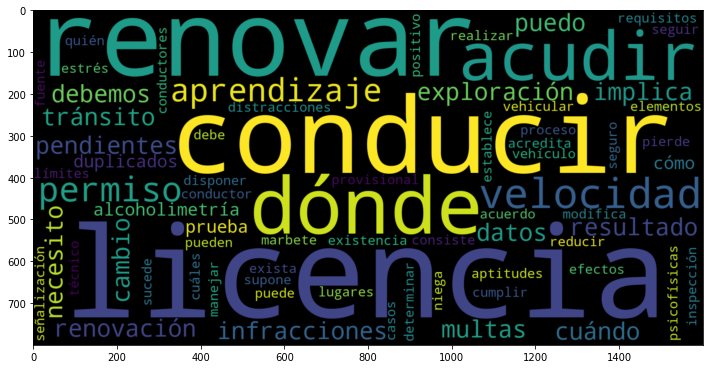

In [12]:
plt.figure(figsize = (12,12)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(data_clean))
plt.imshow(wc, interpolation = 'bilinear')

### Populate Topics table

In [13]:
transit_handbook = open('manual_general.txt', 'r')

count = 0
question_count = 0

while True:
  
  question = transit_handbook.readline()
  if not(question):
    break
  
  count += 1
  res = re.search('\?', question)
  if (res != None): 
        question_count += 1
        topics = preprocess(question)
        topic= ''
        for word in topics:
            topic += word+' '
        topic = topic.strip()

  if (topic != '\r\n') and (res != None):
  
    action_text = ''
        
    last_line = ''
    line = transit_handbook.readline()
    res_line = re.search(".*[?=?]", line)
    while (last_line != '\r\n') and (line != '\r\n') and (len(line.split(' ')) > 5) and (res_line == None):
      
      action_text += line
      last_line = line
      line = transit_handbook.readline()
      
    if action_text != '':
      
      topic_key_name = topic.strip().lower()
      topic_action_text = action_text
      
      response= table.put_item(
          Item={
                'name': "Question {}".format(question_count),
                'topic': topic_key_name,
                'answer': topic_action_text
            }
       )
      if(response["ResponseMetadata"]["HTTPStatusCode"] == 200):
          print('#Insert Susseful: Topic: {}\nText:{}\n\n------\n\n'.format(topic_key_name, topic_action_text))
      else:
          print('#Fail inserting: Topic: {}\nText:{}\n\n------\n\n'.format(topic_key_name, topic_action_text))
        
print("lines: {} & questions: {}".format(count, question_count))

#Insert Susseful: Topic: requisitos cumplir disponer permiso aprendizaje
Text:Para obtener un permiso de aprendizaje, el aspirante tendrá que aprobar el examen teórico de conocimientos comunes y tener una edad mínima de dieciséis (16) años cumplidos. Además, el aspirante tendrá que certificar que ha asistido a los cursos de formación obligatoria, que se recogerán en las Normativas Técnicas sobre las Pruebas a realizar para obtener las Licencias y autorizaciones para conducir y en las Normativas Técnicas sobre la Enseñanza de la Conducción.


------


#Insert Susseful: Topic: supone manejar permiso aprendizaje provisional
Text:Cuando el conductor de un vehículo de motor sea titular de un permiso de aprendizaje cualquier sanción fruto de una infracción, tanto leve como grave, supondrá la retirada del permiso de aprendizaje durante un año antes de poder acceder a la licencia definitiva. Durante la conducción deberá estar acompañado de un conductor titular de una licencia de conducir defin

### Populate Synonymous table

In [14]:
transit_handbook = open('manual_general.txt', 'r')

count = 0
question_count = 0
data_original = ''
data_clean = ''

while True:
  
  question = transit_handbook.readline()
  if not(question):
    break
  
  count += 1
  res = re.search('\?', question)
  if (res != None): 
        question_count += 1
        topics = preprocess(question)
        topic= ''
        for word in topics:
            topic += word+' '
        topic = topic.strip()
        
        for topic_word in topic.split():        
            word, synonyms = generate_synonyms(topic_word)
            
            for dictionary_synonym in synonyms:
                      response= table_synonyms.put_item(
                          Item={
                                'name': dictionary_synonym,
                                'synonyms': topic_word
                            }
                       )
                      
                      if(response["ResponseMetadata"]["HTTPStatusCode"] == 200):
                          print('#Insert Susseful: Topic: {}\Dictionary Synonym:{}\n\n------\n\n'.format(topic_word, dictionary_synonym))
                      
                      print(dictionary_synonym)

        print("{}. {}: {} \n".format(question_count, topic, question))
        
print("lines: {} & questions: {}".format(count, question_count))

#Insert Susseful: Topic: permiso\Dictionary Synonym:autorización

------


autorización
#Insert Susseful: Topic: permiso\Dictionary Synonym:licencia

------


licencia
#Insert Susseful: Topic: permiso\Dictionary Synonym:permiso

------


permiso
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:aprendizaje

------


aprendizaje
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:ciencia

------


ciencia
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:adquisición

------


adquisición
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:ilustración

------


ilustración
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:beca

------


beca
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:conocimiento

------


conocimiento
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:enciclopedismo

------


enciclopedismo
#Insert Susseful: Topic: aprendizaje\Dictionary Synonym:erudición

------


erudición
1. requisitos cumplir disponer permiso aprendizaje: 

### Add Topics to Slots 

In [15]:
try:
    lex_client = boto3.client('lex-models')
except Exception as e:
    print('Failed to create boto3 client')

trafficBot = lex_client.get_bot(
    name='trafficBot',
    versionOrAlias='$LATEST'
)

trafficBot

{'ResponseMetadata': {'RequestId': 'a6a1515e-12c4-4137-a1d0-801452e7375c',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'content-type': 'application/json',
   'date': 'Fri, 06 Nov 2020 16:02:58 GMT',
   'x-amzn-requestid': 'a6a1515e-12c4-4137-a1d0-801452e7375c',
   'content-length': '840',
   'connection': 'keep-alive'},
  'RetryAttempts': 0},
 'name': 'trafficBot',
 'intents': [{'intentName': 'Saludo', 'intentVersion': '3'},
  {'intentName': 'Topic', 'intentVersion': '24'}],
 'enableModelImprovements': True,
 'nluIntentConfidenceThreshold': 0.5,
 'clarificationPrompt': {'messages': [{'contentType': 'PlainText',
    'content': 'Sorry, can you please repeat that?'}],
  'maxAttempts': 5},
 'abortStatement': {'messages': [{'contentType': 'PlainText',
    'content': 'Sorry, I could not understand. Goodbye.'}]},
 'status': 'READY',
 'lastUpdatedDate': datetime.datetime(2020, 11, 5, 21, 45, 4, 612000, tzinfo=tzlocal()),
 'createdDate': datetime.datetime(2020, 11, 5, 15, 19, 0, 965000, tzinfo=t

#### Check if slot type exists

In [20]:
response_checksum = lex_client.get_slot_type(
    name='Topic',
    version='$LATEST'
)

response_checksum['checksum']

'3ac73fae-83fd-4f54-b73e-08fb0b4b0ec1'

In [ ]:
word, synonyms = generate_synonyms("licencia")

for dictionary_synonym in synonyms:
    print(dictionary_synonym)

In [71]:
response = table.scan()
all_data = []

array_topics_words = []

#get topics from DynamoDB
for t in response["Items"]:
    
    print("Current topic: {}".format(t['topic']))
    
    current_topic= t['topic']     
    array_topics_words = []
    
    #Split current topic
    for topic_word in current_topic.split():
        sysm_arr = getSynonym(topic_word)
    
        if(len(sysm_arr) == 0): sysm_arr=[topic_word]

        my_words = {
            topic_word:sysm_arr
        }    

        array_topics_words.append(my_words)
    
    list1 = []
    list2 = [] 
    list3 = []
    list4 = []
    list5 = []
    list6 = []
    list7 = []
    output = []
    count = 1
        
    for my_wor in array_topics_words:

        for x in my_wor:

          if(count == 1): list1 = my_wor[x]
          elif(count == 2): list2 = my_wor[x]
          elif(count == 3): list3 = my_wor[x]
          elif(count == 4): list4 = my_wor[x]
          elif(count == 5): list5 = my_wor[x]
          elif(count == 6): list6 = my_wor[x]
          elif(count == 7): list7 = my_wor[x]

          count += 1  

    array_len = len(array_topics_words)

    if array_len == 3:
        output = [item1+" "+item2+" "+item3
                  for item1 in list1 for item2 in list2 
                  for item3 in list3]
    elif array_len == 4 :
        output = [item1+" "+item2+" "+item3 +" "+ item4
                  for item1 in list1 for item2 in list2 
                  for item3 in list3 for item4 in list4]
    elif array_len == 5:
        output = [item1+" "+item2+" "+item3 +" "+ item4+" "+item5
                  for item1 in list1 for item2 in list2 
                  for item3 in list3 for item4 in list4 
                  for item5 in list5]
    elif array_len == 6:
        output = [item1+" "+item2+" "+item3 +" "+ item4+" "+item5+" "+item6
                  for item1 in list1 for item2 in list2 
                  for item3 in list3 for item4 in list4 
                  for item5 in list5 for item6 in list6]
    elif len(array_topics_words) == 7 :
        output = [item1+" "+item2+" "+item3 +" "+ item4+" "+item5+" "+item6+" "+item7 
                  for item1 in list1 for item2 in list2 
                  for item3 in list3 for item4 in list4 
                  for item5 in list5 for item6 in list6 for item7 in list7]
    else:
        output ="error"

    data = {}
    data['value'] = current_topic
    data['synonyms'] = output
    
    all_data.append(data)
print("Num: {}".format(len(all_data)))

Current topic: cómo acredita existencia seguro
Current topic: acuerdo resultado exploración
Current topic: supone manejar permiso aprendizaje provisional
Current topic: implica renovación licencia conducir
Current topic: sucede pierde marbete inspección técnico vehicular
Current topic: cómo puede determinar velocidad vehículo
Current topic: resultado prueba alcoholimetría positivo
Current topic: requisitos cumplir disponer permiso aprendizaje
Current topic: cambio datos necesito duplicados dónde acudir
Current topic: lugares debe reducir velocidad
Current topic: cuáles límites velocidad casos exista señalización
Current topic: elementos pueden fuente distracciones
Current topic: puedo renovar licencia multas pendientes infracciones tránsito
Current topic: cuándo debemos renovar licencia conducir
Current topic: proceso seguir dónde acudir
Current topic: quién establece modifica
Current topic: efectos estrés conductores
Current topic: conductor niega realizar prueba alcoholimetría
Curren

In [72]:
response_checksum = lex_client.get_slot_type(
        name='Topic',
        version='$LATEST'
)

checksum = response_checksum['checksum']


response_slot = lex_client.put_slot_type(
        name='Topic',
    description='Topic or question of traffic manual',
    enumerationValues=all_data,
    checksum=checksum,
    valueSelectionStrategy='ORIGINAL_VALUE',
    createVersion=True
)